Написать программу на Python, которая __визуализирует ряд зависимостей между признаками и целевыми переменными__ в нижеперечисленных вариациях.

1. Выбрать признак с неким распределением значений, и отобразить это распределение с помощью гистограмм и с помощью графика нормального распределения. 
2. Отобразить распределение значений нескольких признаков одновременно (subplots/pairplot).
3. Выбрать часть признаков датасета и отобразить корреляцию между ними в виде тепловой карты (heatmap). После этого построить тепловую карту, которые будут отображать лишь высокие значения прямой и обратной корреляции. 
4. Выбрать признак (имеющий некое распределение значений), целевую переменную (категориальную) и отобразить для них график размаха (ящик с усами, box plot). 
5. Выбрать целевую переменную и категориальный признак. 

__Произвести группировку значений целевой переменной по категориям признака, и отобразить полученные значения на графике.__ Проанализировать датасеты, разобранные на предыдущих лабораторных работах __(Brooklyn sales map, recs2009_public, лесные пожары, качество вина или аренда велосипедов, двигатели машин).__ Выбрать конкретный датасет и признаки вы можете по желанию, но они должны быть информативными (т.е. графики должны иллюстрировать какие-то наглядные зависимости) и избегайте повторов сочетаний задание/датасет/признаки в пределах группы. Напишите короткий отчет по работе, включив в него программу с комментариями и построенными графиками.

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy.stats import expon, norm

In [113]:
df = pd.read_csv('gdrive/My Drive/ML_TSU/лаба5/hour.csv')

In [114]:
df.head()

instant      dteday  season  yr  ...  windspeed  casual  registered  cnt
0        1  2011-01-01       1   0  ...        0.0       3          13   16
1        2  2011-01-01       1   0  ...        0.0       8          32   40
2        3  2011-01-01       1   0  ...        0.0       5          27   32
3        4  2011-01-01       1   0  ...        0.0       3          10   13
4        5  2011-01-01       1   0  ...        0.0       0           1    1

[5 rows x 17 columns]

In [115]:
df.shape

(17379, 17)

In [116]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [117]:
sns.set(rc={'figure.figsize':(10,10)})
sns.distplot(df['cnt'])#, bins=10

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [118]:
sns.distplot(df['temp'])#, bins=10

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Выбрать часть признаков датасета и отобразить корреляцию между ними в виде тепловой карты (heatmap). После этого построить тепловую карту, которые будут отображать лишь высокие значения прямой и обратной корреляции. 

In [119]:
x = df.drop(['cnt', 'casual', 'dteday', 'registered'], axis=1)
corr = x.corr()
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(corr, cbar=True, annot=True)

In [120]:
df.head()

instant      dteday  season  yr  ...  windspeed  casual  registered  cnt
0        1  2011-01-01       1   0  ...        0.0       3          13   16
1        2  2011-01-01       1   0  ...        0.0       8          32   40
2        3  2011-01-01       1   0  ...        0.0       5          27   32
3        4  2011-01-01       1   0  ...        0.0       3          10   13
4        5  2011-01-01       1   0  ...        0.0       0           1    1

[5 rows x 17 columns]

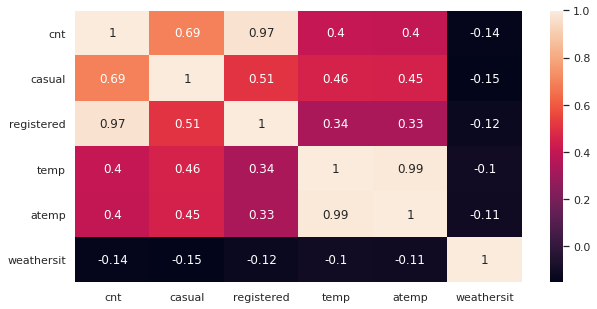

In [121]:
#для высоких значений
x = df[['cnt', 'casual', 'registered', 'temp', 'atemp', 'weathersit']]
corr = x.corr()
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(corr, cbar=True, annot=True)

In [122]:
fig, axs = plt.subplots(6, figsize=(10, 15))
columns = ['cnt', 'casual', 'registered', 'temp', 'atemp', 'weathersit']
for i in range(len(columns)):
    axs[i].title.set_text(columns[i])
    df[columns[i]].hist(ax=axs[i])

In [123]:
sns.distplot(df['cnt'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


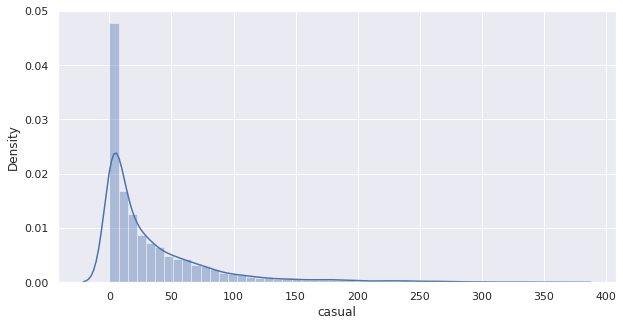

In [124]:
sns.distplot(df['casual'])

In [125]:
sns.distplot(df['registered'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


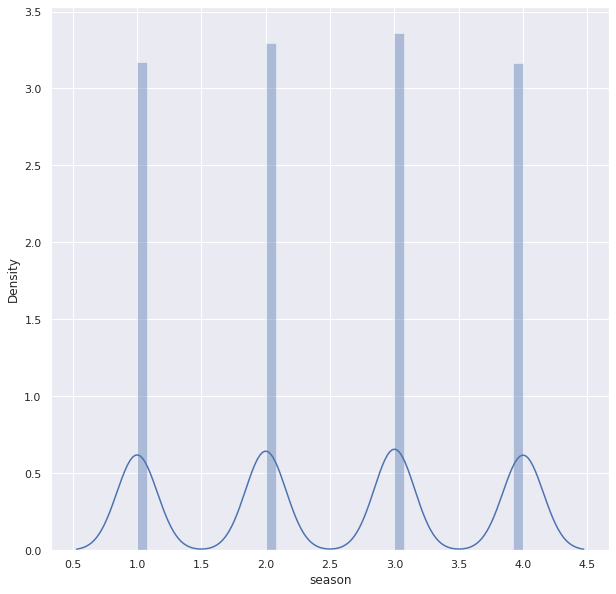

In [152]:
sns.distplot(df['season'])

In [126]:
df.head()

instant      dteday  season  yr  ...  windspeed  casual  registered  cnt
0        1  2011-01-01       1   0  ...        0.0       3          13   16
1        2  2011-01-01       1   0  ...        0.0       8          32   40
2        3  2011-01-01       1   0  ...        0.0       5          27   32
3        4  2011-01-01       1   0  ...        0.0       3          10   13
4        5  2011-01-01       1   0  ...        0.0       0           1    1

[5 rows x 17 columns]

In [140]:
sns.set(rc={'figure.figsize':(20,15)})
sns.pairplot(x)

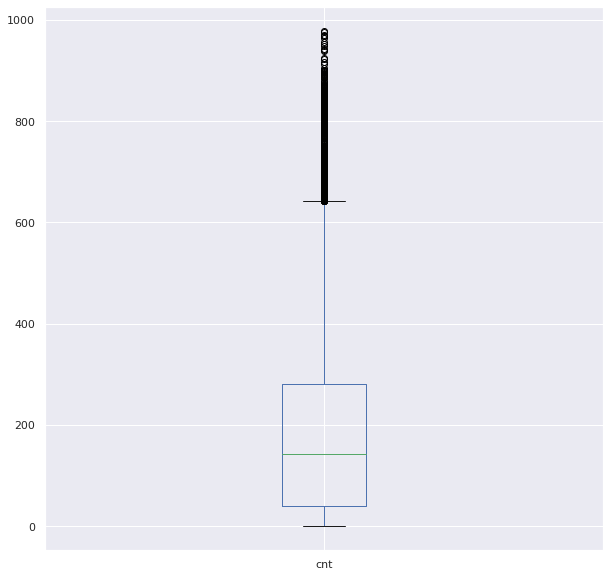

In [145]:
sns.set(rc={'figure.figsize':(10,10)})
df['cnt'].plot(kind='box')
plt.show()

In [146]:
df.head()

instant      dteday  season  yr  ...  windspeed  casual  registered  cnt
0        1  2011-01-01       1   0  ...        0.0       3          13   16
1        2  2011-01-01       1   0  ...        0.0       8          32   40
2        3  2011-01-01       1   0  ...        0.0       5          27   32
3        4  2011-01-01       1   0  ...        0.0       3          10   13
4        5  2011-01-01       1   0  ...        0.0       0           1    1

[5 rows x 17 columns]

In [148]:
df_box = df[['season','cnt','holiday', 'hr', 'instant', 'hum', 'temp']]

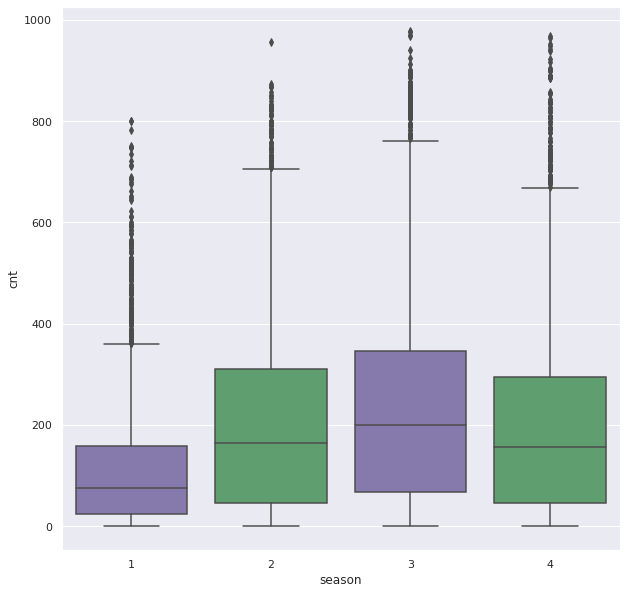

In [151]:
sns.set(rc={'figure.figsize':(10,10)})

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='season', y='cnt', palette=["m", "g"], data=df_box)